In [1]:
from sympy import *; init_session()

IPython console for SymPy 0.7.7.dev (Python 2.7.10-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/dev


In [32]:
import random as rand
import numpy as np

In [3]:
from applpy import *

In [4]:
# Example 1

In [4]:
rand.seed(3)
results = []
for i in range(5):
    nrep = 4000000
    count = 0
    for i in range(nrep):
        x = sum([rand.random() for j in range(8)])
        if x > 3 and x < 6:
            count += 1
    results.append(count/nrep)
print(results)

[0.88131075, 0.88124125, 0.88117425, 0.88130075, 0.88114075]


In [5]:
n = 8
X = UniformRV(Rational(0),Rational(1))
Y = ConvolutionIID(X,n)

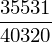

In [6]:
CDF(Y,6) - CDF(Y,3)

In [41]:
# Example 2

In [7]:
X = TriangularRV(1,2,4)
Y = TriangularRV(1,2,3)
V = X*Y
V.simplify()

continuous pdf
for 1 <= x <= 2
---------------------------
  4⋅x   2⋅(x + 1)⋅log(x)   4
- ─── + ──────────────── + ─
   3           3           3
---------------------------
 
 
for 2 <= x <= 3
---------------------------
          ⎛ 7⋅x   14    5⋅x    ⎞    
          ⎜ ─── + ──  - ─── - 4⎟    
10⋅x      ⎜  3    3      3     ⎟    
──── + log⎝2        ⋅x         ⎠ - 8
 3                                  
---------------------------
 
 
for 3 <= x <= 4
---------------------------
         ⎛    7⋅x   2  -2⋅x         ⎞    
         ⎜    ─── + ─  ─────        ⎟    
         ⎜     3    3    3    -x - 2⎟    
         ⎜16⋅2       ⋅3     ⋅x      ⎟    
2⋅x + log⎜──────────────────────────⎟ - 4
         ⎝            9             ⎠    
---------------------------
 
 
for 4 <= x <= 6
---------------------------
           ⎛ -5⋅x   -2⋅x   4⋅x   22⎞     
           ⎜ ─────  ─────  ─── + ──⎟     
           ⎜   3      3     3    3 ⎟     
  8⋅x      ⎜2     ⋅6     ⋅x        ⎟   44
- ─── + log⎜─────────

In [8]:
PlotDist(V)

In [13]:
# Example 3 

In [9]:
X = ExponentialRV(Rational(1,2))
Y = ExponentialRV(Rational(1,3))
Z = X+Y
Z.display()

continuous pdf
for 0 <= x <= oo
---------------------------
   -x     -x 
   ───    ───
    2      3 
- ℯ    + ℯ   
---------------------------


In [15]:
# Example 4

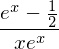

In [13]:
x = Symbol('x',positive=True)
X = RV([x,2*x],[0,1,oo],['continuous','hf'])
simplify(Mean(X))

In [14]:
X.display()

continuous hf
for 0 <= x <= 1
---------------------------
x
---------------------------
 
 
for 1 <= x <= oo
---------------------------
2⋅x
---------------------------


In [15]:
# Example 5

In [18]:
x = Symbol('x')
X = RV([x/21],[1,6],['Discrete','pdf'])

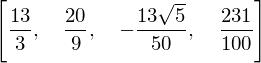

In [19]:
[Mean(X),Variance(X),Skewness(X),Kurtosis(X)]

In [20]:
# Example 3.1

In [21]:
theta = Symbol('theta',positive=True)
X = ExponentialRV(theta)
Y = ExponentialRV(Rational(100))
data = [97, 51, 11, 4, 14, 18, 142, 68, 77, 80, 1, 16, 106, 206,
82, 54, 31, 216, 46, 111, 39, 63, 18, 191, 18, 163, 24]
P = Posterior(X,Y,data,theta)

In [23]:
P.display()

continuous pdf
for 0 <= x <= oo
---------------------------
                                                                              
223651470780472429403739591482279675119940755544475945516524580397841845987344
──────────────────────────────────────────────────────────────────────────────
                                       473429106539928354816000000            

                27  -2047⋅x
60330816772007⋅x  ⋅ℯ       
───────────────────────────
                           
---------------------------


In [26]:
CredibleSet(P,0.10)

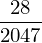

In [27]:
Mean(P)

In [28]:
Mean(P).evalf()

In [29]:
X = BinomialRV(12,theta)
Y = TriangularRV(Rational(0),Rational(1,2),Rational(1))
data = [5,6,3,2,5]
P = Posterior(X,Y,data,theta)

In [30]:
P.display()

continuous pdf
for 0 <= x <= 1/2
---------------------------
                                       22        39 
-543985284099935107948831513667174400⋅x  ⋅(x - 1)   
────────────────────────────────────────────────────
                 395821499369962291                 
---------------------------
 
 
for 1/2 <= x <= 1
---------------------------
                                      21        40
543985284099935107948831513667174400⋅x  ⋅(x - 1)  
──────────────────────────────────────────────────
                395821499369962291                
---------------------------


In [4]:
# Example 3.2

In [43]:
rand.seed(5)
tr = [16,23,38,94,99,141,197]
n = len(tr)
B = 50
x = []
for i in range(50):
    samp = [rand.sample(tr,1)[0] for i in range(n)]
    med = np.median(samp)
    x.append(med)
np.std(x)

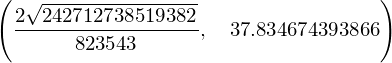

In [34]:
treatment = [16,23,38,94,99,141,197]
X = BootstrapRV(treatment)
Y = OrderStat(X,7,4)
sqrt(Variance(Y)),sqrt(Variance(Y)).evalf()

In [8]:
# Example 3.3

In [4]:
X = MarkovChain(P = [ [Rational(45,100), Rational(48,100),Rational(7,100)],
                    [Rational(5,100),Rational(70,100),Rational(25,100)],
                    [Rational(1,100),Rational(50,100),Rational(49,100)]],
                init = [Rational(5,100),Rational(80,100),Rational(15,100)],
                states = ['stormy','cloudy','sunny'])

In [5]:
X.display()

The transition probability matrix:
       stormy cloudy   sunny
stormy   9/20  12/25   7/100
cloudy   1/20   7/10     1/4
sunny   1/100    1/2  49/100
----------------------------------------
The initial system state:
        Prob
stormy  1/20
cloudy   4/5
sunny   3/20


In [15]:
X.display(option='steady state',method ='rational')

The steady state probabilities are:
                0
stormy     35/561
cloudy  1399/2244
sunny     235/748


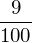

In [16]:
X.probability([(3,'stormy')],given=[(1,'cloudy'),(0,'sunny')],method='rational')

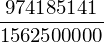

In [17]:
X.probability([(5,'cloudy')],method='rational')

In [1]:
# Example 3.4

In [44]:
Y = UniformRV(0,1/2)

In [45]:
A = 1 - exp(-2*y)
B = exp(-2*y) - 1/2
C = Rational(1,2) - exp(-2* (1-y))

In [46]:
ys = solve(B-C,y)[0].evalf()
yss = solve(A-C,y)[3].evalf()

In [47]:
g = [[A,B,C],[0,ys,yss,0.5]] 

In [29]:
# Example 3.5

In [50]:
x=Symbol('x')
X1 = BinomialRV(23, Rational(21,23))
X1 = Transform(X1,[[x/23],[0,23]])
X2 = BinomialRV(28,Rational(27,28))
X2 = Transform(X2,[[x/28],[0,28]])
X3 = BinomialRV(84,Rational(82,84))
X3 = Transform(X3,[[x/84],[0,84]])

In [51]:
T = X1*X2*X3

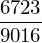

In [52]:
IDF(T,0.05)

In [47]:
# Example 3.6

In [53]:
theta = Symbol('theta',positive=True)
mu = Symbol('mu',positive=True)
X = ExponentialRV(theta)
Y = ExponentialRV(mu)

In [54]:
T = Queue(X,Y,4,0,1)

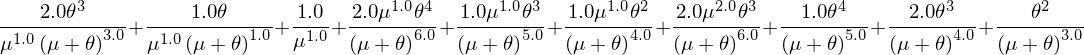

In [55]:
Mean(T)

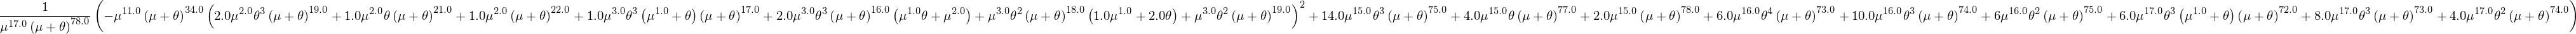

In [56]:
Variance(T)

In [4]:
# Example 3.8

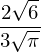

In [57]:
Mean(ChiRV(3))/sqrt(3)

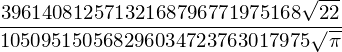

In [58]:
Mean(ChiRV(99))/sqrt(99)

In [60]:
# Example 3.9

In [71]:
U1 = UniformRV(0,Rational(1))
U2 = UniformRV(0,Rational(1))
V1 = U1 - U2
V1.simplify()

continuous pdf
for -1 <= x <= 0
---------------------------
x + 1
---------------------------
 
 
for 0 <= x <= 1
---------------------------
-x + 1
---------------------------


In [72]:
g1 = [[x*x,x*x],[-oo,0,oo]]
V2 = Transform(V1,g1)

In [73]:
V2.display()

continuous pdf
for 0 <= x <= 1
---------------------------
     1 
-1 + ──
     √x
---------------------------


In [74]:
V3 = V2+V2

KeyboardInterrupt: 

In [70]:
V3.display()

continuous pdf
for 0 <= x <= 1
---------------------------
√x⋅(-log(x) + 4) - log(x) - 4
─────────────────────────────
              √x             
---------------------------


In [73]:
g2 = [[sqrt(x)],[0,2]]
V4 = Transform(V3,g2)

In [75]:
V4.simplify()

continuous pdf
for 0 <= x <= 1
---------------------------
-4⋅x⋅log(x) + 8⋅x - 4⋅log(x) - 8
---------------------------


In [78]:
# Example 3.13

In [59]:
X = WeibullRV(2,2)

In [60]:
alist = X.variate(n=10)
blist = X.variate(n=12)
clist = X.variate(n=17)

In [61]:
alist = [0.2135,0.3153,0.3841,0.3946,0.4707,0.5107,0.5783,0.5960,0.6404,0.7601]
blist = [0.0482,0.0945,0.1149,0.2441,0.287,0.311,0.3362,0.3924,0.4166,0.4194,0.6217,0.698]
clist = [0.0474,0.2732,0.2828,0.2952,0.337,0.3627,0.3698,0.4348,0.4968,0.5061,0.5093,
         0.5211,0.5266,0.6654,0.6951,0.6975,0.7694]

In [62]:
A = BootstrapRV(alist)
B = BootstrapRV(blist)
C = BootstrapRV(clist)

In [63]:
Sstar = Minimum( MaximumIID(A,2),
               Minimum(MaximumIID(B,3),
                      MaximumIID(C,3)))
Sstar1 = Minimum(MaximumIID(A,2),
                 MaximumIID(B,3),
                 MaximumIID(C,3))

In [64]:
Mean(Sstar),Mean(Sstar1)

In [67]:
n = 2
target = 1.05
m = Mean(Sstar)
mux = m
while (mux < target * m):
    n+=1
    System = Minimum(MaximumIID(A,n),
                 MaximumIID(B,3),
                 MaximumIID(C,3))
    mux = Mean(System)
    print n,mux
print n

3 0.438389764206852
4 0.444444894458068
5 0.447839359028730
5
